This is how much space the figure will take up on letter paper


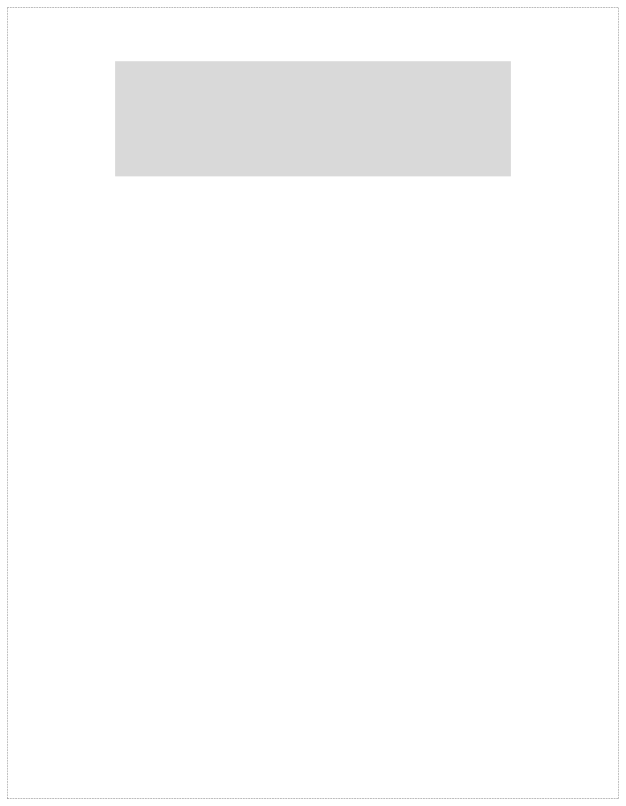

In [1]:
__PRODUCTION__ = 0
__NAME__       = 'motivation'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

In [2]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import pickle
from symfac.experimental import RBFExpansionV2
from symfac.experimental import RBFExpansionMiniBatch

In [51]:
import csv
gas500 = []
with open('gas500.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        gas500.append(list(map(float, row)))

In [56]:
for i in range(500):
    gas500[i] = gas500[i]/np.linalg.norm(gas500[i])

In [57]:
gas_tensor = torch.tensor(gas500, dtype=torch.float32, device="cuda")

In [58]:
U, S, V = np.linalg.svd(gas_tensor.cpu().detach().numpy())


In [61]:
s_vals = []
for s in range(1, 128):
    s_vals.append(round(float(F.mse_loss(torch.tensor((U[:, :s] * S[None, :s]) @ V[:s, :]), gas_tensor.cpu())), 7))

In [62]:
s_vals

[0.0034106,
 0.0021138,
 0.0015707,
 0.0011142,
 0.0008252,
 0.0006475,
 0.0004954,
 0.0003972,
 0.0003299,
 0.0002764,
 0.0002387,
 0.0002033,
 0.0001702,
 0.0001462,
 0.0001286,
 0.0001127,
 9.98e-05,
 8.74e-05,
 7.98e-05,
 7.26e-05,
 6.6e-05,
 6.09e-05,
 5.6e-05,
 5.13e-05,
 4.71e-05,
 4.33e-05,
 4.01e-05,
 3.7e-05,
 3.45e-05,
 3.22e-05,
 3e-05,
 2.8e-05,
 2.61e-05,
 2.44e-05,
 2.3e-05,
 2.16e-05,
 2.03e-05,
 1.92e-05,
 1.8e-05,
 1.69e-05,
 1.59e-05,
 1.5e-05,
 1.41e-05,
 1.33e-05,
 1.26e-05,
 1.19e-05,
 1.12e-05,
 1.06e-05,
 9.9e-06,
 9.3e-06,
 8.8e-06,
 8.3e-06,
 7.8e-06,
 7.3e-06,
 6.9e-06,
 6.5e-06,
 6.1e-06,
 5.7e-06,
 5.4e-06,
 5.1e-06,
 4.8e-06,
 4.5e-06,
 4.2e-06,
 3.9e-06,
 3.7e-06,
 3.4e-06,
 3.2e-06,
 3e-06,
 2.8e-06,
 2.6e-06,
 2.4e-06,
 2.3e-06,
 2.1e-06,
 2e-06,
 1.8e-06,
 1.7e-06,
 1.6e-06,
 1.5e-06,
 1.4e-06,
 1.3e-06,
 1.2e-06,
 1.1e-06,
 1e-06,
 9e-07,
 9e-07,
 8e-07,
 7e-07,
 7e-07,
 6e-07,
 6e-07,
 5e-07,
 5e-07,
 4e-07,
 4e-07,
 4e-07,
 3e-07,
 3e-07,
 3e-07,
 3

In [38]:
bs = 50
n = 500
m = 128
num_iters = 20000

100%|██████████| 40000/40000 [10:23<00:00, 64.20it/s]


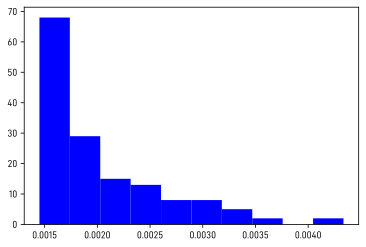

tensor(0.0015)


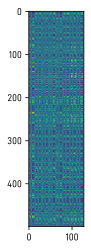

[tensor(0.0015)]


In [63]:
errors = []
for k in range(3,4):
    u0=1/1000*torch.randn([bs, n, k], device="cuda") 
    v0=1/1000*torch.randn([bs, m, k], device="cuda") 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac_mini = RBFExpansionV2(k=k, batch_size=bs, max_steps=num_iters)
    #fac_mini = RBFExpansionMiniBatch(k=k, mini_batch_size= 8 * 128, batch_size=bs, max_steps=num_iters, mini_batch_by='elements')
   
    fac_mini.fit(
        gas_tensor,
        u0=u0,
        v0=v0,
        a0=a,
        b0=b
    )
    plt.hist(fac_mini.report.loss_best, color='b', label='1')
    plt.show()
    error = fac_mini.report.loss_best
    print(torch.min(error))
    errors.append(torch.min(error))
    plt.imshow(fac_mini.optimum(runs=torch.argmin(fac_mini.report.loss_best)))
    plt.show()
  #  open('gas_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac_mini.optimum.x))
print(errors)


In [81]:
map(fac_mini.report.loss_best, double)

NameError: name 'double' is not defined

TypeError: 'map' object is not subscriptable

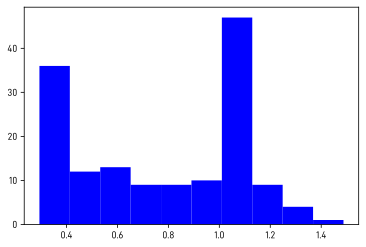

tensor(0.2938)


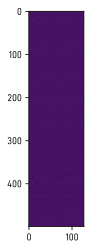

In [42]:
plt.hist(fac_mini.report.loss_best, color='b', label='1')
plt.show()
error =
print(torch.min(fac.report.loss_best))
errors.append(torch.min(error))
plt.imshow(fac_mini.optimum(runs=torch.argmin(fac_mini.report.loss_best)))
plt.show()


In [64]:
plt.loglog(
    fac_mini.report.loss_history_ticks,
    fac_mini.report.loss_history,
    lw=0.5,
    alpha=0.5,
)
plt.loglog(
    fac_mini.report.loss_history_ticks,
    fac_mini.report.loss_history.min(axis=1),
    lw=1,
    color='k'
)

plt.show()

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

In [19]:
open('graph_kernel_losses.pickle', 'wb').write(pickle.dumps(errors))

5454

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

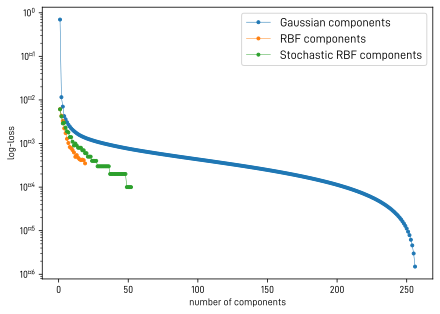

In [95]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, target.shape[0]+1), s_vals, '.-', label='Gaussian components')
plt.plot(range(1, len(errors)+1), errors, '.-', label='RBF components')
plt.plot(range(1, len(rgb_sgd)+1), rgb_sgd, '.-', label='Stochastic RBF components')
plt.ylabel('log-loss')
plt.yscale('log')
plt.xlabel('number of components')
plt.legend(loc='upper right', fontsize=12)
#plt.title('Graph kernel 256*256')
plt.show()

In [91]:
def find_svd(X,s):
    U, S, V = np.linalg.svd(X.detach().numpy())
    return round(float(F.mse_loss(torch.tensor((U[:, :s] * S[None, :s]) @ V[:s, :]), X)), 7)

In [38]:
s_vals[200]

0.0001

In [93]:
s_vals = []
for s in range(target.shape[0]):
    s_vals.append(find_svd(target, s))

In [94]:
len(target)

256

In [11]:
errors_mini = []
for k in range(10,11):
    u0=1/1000*torch.randn([bs, target.shape[0], k], device="cuda") 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac_mini = RBFExpansionMiniBatch(k=k, mini_batch_size= 8 * target.shape[0], batch_size=bs, max_steps=num_iters, mini_batch_by='elements')
    

    fac_mini.fit_custom(
        target,
        f=lambda u, a, b:
            torch.sum(
                fac_mini.rbf(u[..., :, None, :] - u[..., None, :, :]) *
                a[..., None, None, :],
                dim=-1
            ) + b[..., None, None],
        f_minibatch=lambda i, j, u, a, b:
            torch.sum(
                fac_mini.rbf(u[..., i, :] - u[..., j, :]) * a[..., None, :],
            dim=-1
        ) + b[..., None],
        seed=0,
        u=0.001 * fac_mini.randn(fac_mini.batch_size, target.shape[0], fac_mini.k),
        a=fac_mini.randn(fac_mini.batch_size, fac_mini.k),
        b=fac_mini.randn(fac_mini.batch_size)
)
    plt.hist(fac_mini.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac_mini.report.loss_best
    print(torch.min(error))
    errors_mini.append(torch.min(error))
    plt.imshow( fac_mini.optimum(runs=torch.argmin( fac_mini.report.loss_best)))
    plt.show()
  #  open('fac_kernel_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors_mini)



  0%|          | 10/25000 [00:00<02:19, 178.73it/s]


RuntimeError: CUDA out of memory. Tried to allocate 126.00 MiB (GPU 0; 11.91 GiB total capacity; 394.21 MiB already allocated; 50.94 MiB free; 508.00 MiB reserved in total by PyTorch)

In [56]:
s_vals[28]

0.0011

In [87]:
rgb_sgd =[0.0061,0.0042,0.0029,0.0030,0.0023,0.0019,0.0018,0.0014,0.0014,0.0011,0.0009,0.0010,0.0009,0.0008,0.0008,0.0008,0.0007,0.0007,0.0006,0.0006,0.0005,0.0005,0.0005, 0.0004, 0.0004,0.0004,0.0004,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0001, 0.0001, 0.0001, 0.0001]

In [88]:
len(rgb_sgd)

52

In [90]:
open('graph_kernel_sgd_losses.pickle', 'wb').write(pickle.dumps(rgb_sgd))

484

In [96]:

torch.min(error)

tensor(0.0001)

tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002, 0.0002, 0.0002, 0.0002, 0.0002])

In [ ]:
def funk(U, a):
    n = U.shape[0]
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i][j] = np.exp(-np.linalg.norm(gas_array[i,:] - gas_array[j,:])**2/(2*a*a))
    return K